In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import PHONBANK_DFS
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(PHONBANK_DFS/'transcript_df.pickle')
transcript_df[:3]

,transcript_id,transcript_root_name,corpus,version,date,language,media,xml_loc
0,2M-AA,corpora_Spanish_Vivar_Santiago_2M-AA,Santiago,PB1.2,2016-11-06,spa,Vivar/Santiago/2M-AA.wav,/mnt/cube/tsainbur/Projects/github_repos/child...
0,4M-MB,corpora_Spanish_Vivar_Santiago_4M-MB,Santiago,PB1.2,2016-11-20,spa,Vivar/Santiago/4M-MB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...
0,2A-IB,corpora_Spanish_Vivar_Santiago_2A-IB,Santiago,PB1.2,2016-11-08,spa,Vivar/Santiago/2A-IB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...


In [7]:
transcript_df.language.unique()

array(['spa', 'cat spa eng', 'spa eng', 'spa glg', 'glg spa', 'nan zho',
       'fra', 'fra eng', 'fra por', 'eng', 'por fra und', 'fra por und',
       'eng jpn', 'jpn eng', 'deu', 'ron', 'por', 'cat', 'taq', 'ara',
       'ara eng', 'crl', 'que', 'pol eng', 'pol', 'nld', 'nld fra', 'swe',
       'nor', 'jpn'], dtype=object)

In [9]:
transcript_df.corpus.unique()

array(['Santiago', 'Temuco', 'Antofagasta', 'Punta Arenas', 'Yasmin',
       'Irene', 'Koine', 'koiné', 'Tsay', 'cha', 'car', 'lau', 'mar',
       'noe', 'kur', 'GoadRose', 'Marie', 'Theotime', 'Anais', 'Nathan',
       'Camille - FINAL', 'Pierre - FINAL', 'Hunkeler', 'Esteban',
       'Baptiste', 'Jules', 'Emma', 'Yamaguchi', 'Leonard', 'Anae',
       'Theophile', 'Antoine', 'Madeleine', 'Julie', 'Smith', 'por',
       'fra', 'Reading', 'Naming', 'FallsChurch', 'NWR IMRS 71',
       'NWR IMRS 50', 'P', 'G', 'J', 'VYSA', 'Goga', 'Laura', 'Raquel',
       'Luis', 'Pedro', 'Joao', 'Marta', 'Ines', 'CCF', 'EstevePrieto',
       'Berber', 'All data', '2;4-2;7', '1;8-1;11', '2;0-2;3', '3;0-3;3',
       '1;4-1;7', '3;4-3;7', '2;8-2;11', 'Arabic', 'Feryel', 'Malek',
       'Zaidaan', 'Cree', 'Gildersleeve', 'WeistJarosz', 'ED', 'AL', 'VH',
       'LD', 'AD', 'TL', 'LL', 'VD', 'BL', 'EL', 'RL', 'NB', 'BW', 'HH',
       'NW', 'DB', 'VZ', 'CH', 'FZ', 'PW', 'MB', 'Grimm', 'Tirza', 'Elke',
       

In [10]:
len(transcript_df)

6608

In [11]:
participants = list((PHONBANK_DFS / 'participants').glob('*.pickle'))
transcripts = list((PHONBANK_DFS / 'transcripts').glob('*.pickle'))
participants[:2], transcripts[:2]

([PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/participants/corpora_Eng-NA_ComptonPater_Julia_021001.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/participants/corpora_Eng-NA_Davis-CDI_Ben-WG_Ben-1_10_08.pickle')],
 [PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/transcripts/corpora_Eng-NA_Davis_Jodie_010127.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/processed/phonbank/transcripts/corpora_French_Yamaguchi_Yamaguchi_040326.pickle')])

In [12]:
len(transcripts), len(participants)

(6608, 6608)

### Descriptive statistics

In [13]:
n_unique_phones = []
n_phones = []
durations = []
for transcript in tqdm(transcripts):
    trans = pd.read_pickle(transcript)
    durations.append(np.sum(trans.duration_ms.values.astype('float32')))
    phones = np.array(list(flatten(trans.ipa_model.values)))
    phones = phones[pd.isnull(phones) == False]
    phones = ''.join(phones)
    n_phones.append(len(phones))
    n_unique_phones.append(len(np.unique(list(phones))))

In [14]:
trans[:3]

,record_id,speaker,orthography,start_time_ms,duration_ms,ipa_model,ipa_actual,transcript_id,xml_loc
0,18a95894-d179-45f9-a403-2c49b023fd74,CHI,[perro],31046.0,735.0,[ˈpero],[ˈfeno],1B-JC,/mnt/cube/tsainbur/Projects/github_repos/child...
0,a1f4c157-d8bc-4555-ad8a-5b97266560e3,CHI,[ojo],35760.0,483.0,[ˈoxo],[ˈox],1B-JC,/mnt/cube/tsainbur/Projects/github_repos/child...
0,22c90725-1042-438b-8356-56e55a085d48,CHI,[sopa],73154.0,391.0,[ˈsopa],[ˈtofḁ],1B-JC,/mnt/cube/tsainbur/Projects/github_repos/child...


In [15]:
np.sum(n_phones)

4784084

In [16]:
durations[:3]

[0.0, 3627874.8, 529300.0]

array([ 0.        , 60.46458   ,  8.821667  , ...,  0.6122167 ,
        0.57706666,  0.5161167 ], dtype=float32)

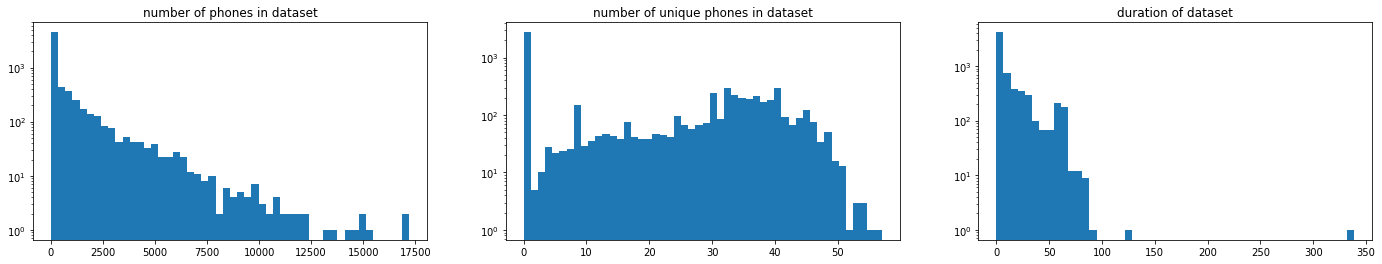

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(24,4))
axs[0].hist(n_phones, bins=50);
axs[1].hist(n_unique_phones, bins=50);
axs[2].hist((np.array(durations) / 1000)/60, bins=50);

axs[0].set_title('number of phones in dataset')
axs[0].set_yscale('log')
axs[1].set_title('number of unique phones in dataset')
axs[1].set_yscale('log')
axs[2].set_title("duration of dataset")
axs[2].set_yscale('log')